# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: employee.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('employee.csv')
print(data.shape)
data.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
data.columns = ['Satisfaction','Evaluation','Project','AVG_MthHour','TimeSpend',
           'WorkAccident','Left','Promotion','Department','Salary']
data.head()

,Satisfaction,Evaluation,Project,AVG_MthHour,TimeSpend,WorkAccident,Left,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

0    11428
1     3571
Name: Left, dtype: int64


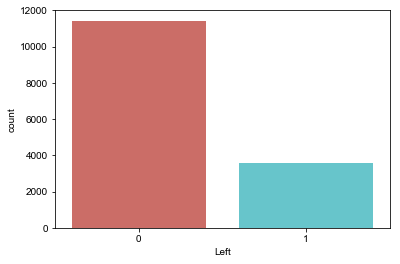

In [3]:
print(data['Left'].value_counts())

sns.countplot(x='Left',data = data, palette='hls',order = data['Left'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

0    14680
1      319
Name: Promotion, dtype: int64


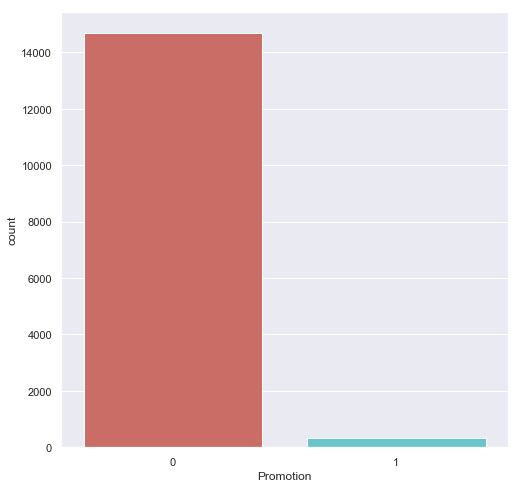

In [4]:
print(data['Promotion'].value_counts())

sns.countplot(x='Promotion',data = data, palette='hls',order = data['Promotion'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64


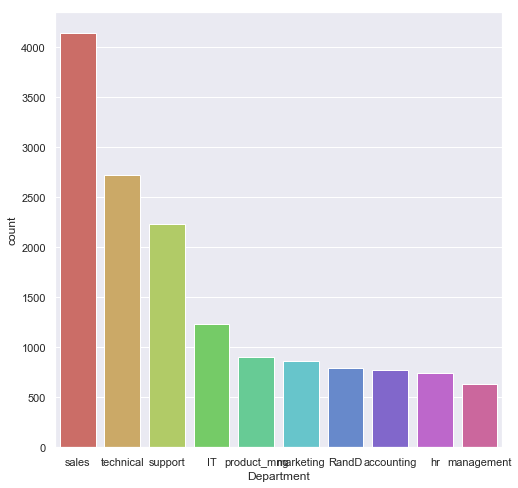

In [5]:
print(data['Department'].value_counts())

sns.countplot(x='Department',data = data, palette='hls',order = data['Department'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

low       7316
medium    6446
high      1237
Name: Salary, dtype: int64


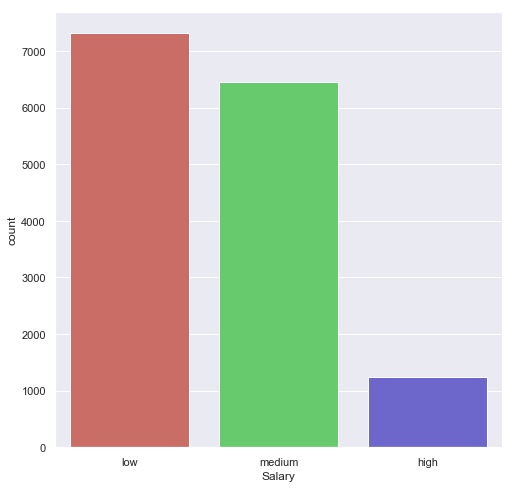

In [6]:
print(data['Salary'].value_counts())

sns.countplot(x='Salary',data = data, palette='hls',order = data['Salary'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [7]:
data.isnull().sum()

Satisfaction    0
Evaluation      0
Project         0
AVG_MthHour     0
TimeSpend       0
WorkAccident    0
Left            0
Promotion       0
Department      0
Salary          0
dtype: int64

## Convert Categorical to Numerical

In [8]:
data["Department"] = data["Department"].astype('category')
data["Department*"] = data["Department"].cat.codes  

data["Salary"] = data["Salary"].astype('category')
data["Salary*"] = data["Salary"].cat.codes  

data.head()

,Satisfaction,Evaluation,Project,AVG_MthHour,TimeSpend,WorkAccident,Left,Promotion,Department,Salary,Department*,Salary*
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


## Correlation

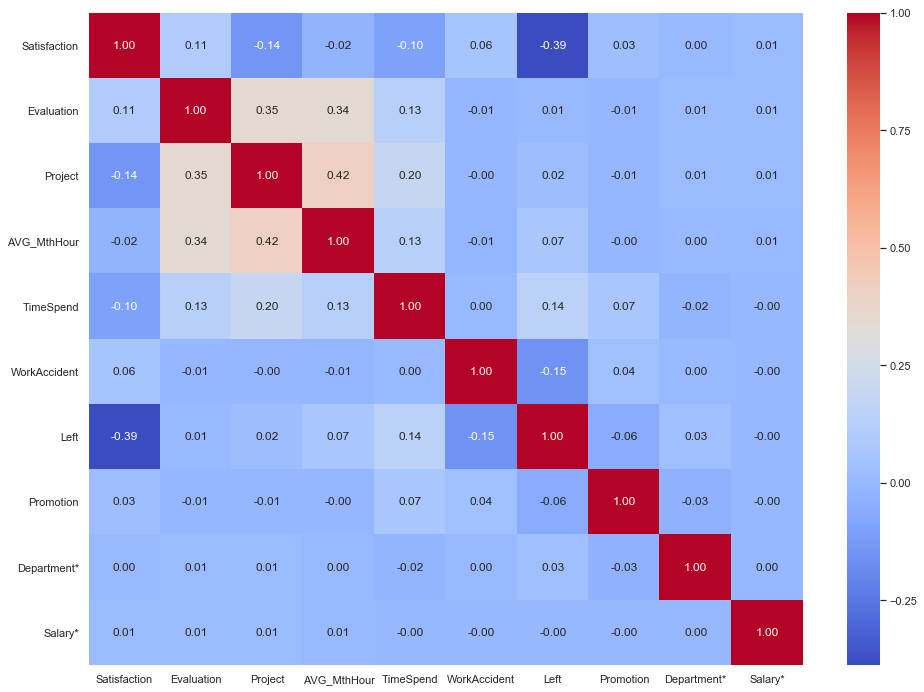

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [10]:
corr_rank = data.corr()
corr_rank["Left"].sort_values(ascending=False)

Left            1.000000
TimeSpend       0.144822
AVG_MthHour     0.071287
Department*     0.032105
Project         0.023787
Evaluation      0.006567
Salary*        -0.001294
Promotion      -0.061788
WorkAccident   -0.154622
Satisfaction   -0.388375
Name: Left, dtype: float64

## Data Processing and Selection

In [11]:
X = data[['TimeSpend','AVG_MthHour','Department*','Project','Evaluation',
          'Salary*','Promotion','WorkAccident','Satisfaction']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (14999, 9)


array([[  3.  , 157.  ,   7.  ,   2.  ,   0.53,   1.  ,   0.  ,   0.  ,
          0.38],
       [  6.  , 262.  ,   7.  ,   5.  ,   0.86,   2.  ,   0.  ,   0.  ,
          0.8 ]])

In [12]:
y = data[['Left']].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (14999, 1)


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

## Data Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (14999, 9)


array([[-0.34123516, -0.88203988,  0.39372503, -1.46286291, -1.08727529,
        -0.55495458, -0.14741182, -0.41116529, -0.93649469],
       [ 1.71343614,  1.22042276,  0.39372503,  0.97111292,  0.84070693,
         1.04300352, -0.14741182, -0.41116529,  0.75281433]])

## Split Train Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (10499, 9) (10499, 1)
X TEST Set :  (4500, 9) (4500, 1)


## Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Square               : 0.8092
Mean Absolute Error    : 0.0349
Mean Squared Error     : 0.0349
Root Mean Squared Error: 0.1868
Accuracy               : 0.9651
Precision              : 0.9336
Recall                 : 0.9207


## Data Prediction

In [16]:
df_pred1 = data[data.index == 2000]
df_pred2 = data[data.index == 51]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Satisfaction,Evaluation,Project,AVG_MthHour,TimeSpend,WorkAccident,Left,Promotion,Department,Salary,Department*,Salary*
2000,0.58,0.74,4,215,3,0,0,0,sales,low,7,1
51,0.44,0.55,2,135,3,0,1,0,support,low,8,1


In [17]:
Xp = df_pred[['TimeSpend','AVG_MthHour','Department*','Project','Evaluation',
              'Salary*','Promotion','WorkAccident','Satisfaction']].values
Xp = scaler.transform(Xp)

y = df_pred[['Left']].values

In [18]:
GB_pred = gb.predict(Xp)
GB_pred

array([0, 1], dtype=int64)